## Analysing Airport Review DataSets

In [1]:
import pandas as pd

In [2]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
airport_data=pd.read_csv('airport.csv')
print(airport_data.shape)
airport_data.head(1)


(17721, 20)


,airport_name,link,title,author,author_country,date,content,experience_airport,date_visit,type_traveller,overall_rating,queuing_rating,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverages_rating,airport_shopping_rating,wifi_connectivity_rating,airport_staff_rating,recommended
0,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,Klaus Malling,Denmark,2014-02-11,A small very effective airport with few flight...,NaN,NaN,NaN,9.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,1


In [4]:
airport_data.describe()

,overall_rating,queuing_rating,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverages_rating,airport_shopping_rating,wifi_connectivity_rating,airport_staff_rating,recommended
count,13796.000000,12813.000000,12815.000000,587.000000,27.000000,630.000000,12676.000000,412.000000,26.000000,17721.000000
mean,4.274355,2.747912,3.442450,2.580920,2.592593,2.169841,2.821631,2.405340,2.038462,0.221206
std,2.722765,1.572520,1.337508,1.403862,1.393923,1.534358,1.410575,1.579452,1.248384,0.415071
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.500000,0.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000


In [5]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17721 entries, 0 to 17720
Data columns (total 20 columns):
airport_name                   17721 non-null object
link                           17721 non-null object
title                          17721 non-null object
author                         17721 non-null object
author_country                 12777 non-null object
date                           17721 non-null object
content                        17721 non-null object
experience_airport             647 non-null object
date_visit                     593 non-null object
type_traveller                 646 non-null object
overall_rating                 13796 non-null float64
queuing_rating                 12813 non-null float64
terminal_cleanliness_rating    12815 non-null float64
terminal_seating_rating        587 non-null float64
terminal_signs_rating          27 non-null float64
food_beverages_rating          630 non-null float64
airport_shopping_rating        12676 non-null floa

In [6]:
#Percentage Null Values
round((airport_data.isna().sum()/len(airport_data)*100),2)

airport_name                    0.00
link                            0.00
title                           0.00
author                          0.00
author_country                 27.90
date                            0.00
content                         0.00
experience_airport             96.35
date_visit                     96.65
type_traveller                 96.35
overall_rating                 22.15
queuing_rating                 27.70
terminal_cleanliness_rating    27.68
terminal_seating_rating        96.69
terminal_signs_rating          99.85
food_beverages_rating          96.44
airport_shopping_rating        28.47
wifi_connectivity_rating       97.68
airport_staff_rating           99.85
recommended                     0.00
dtype: float64

In [7]:
filtered_airport_data=airport_data.drop(['experience_airport','date_visit','type_traveller','terminal_seating_rating','terminal_signs_rating','food_beverages_rating','wifi_connectivity_rating','airport_staff_rating'],axis=1)

In [8]:
round((filtered_airport_data.isna().sum()/len(filtered_airport_data)*100),2)

airport_name                    0.00
link                            0.00
title                           0.00
author                          0.00
author_country                 27.90
date                            0.00
content                         0.00
overall_rating                 22.15
queuing_rating                 27.70
terminal_cleanliness_rating    27.68
airport_shopping_rating        28.47
recommended                     0.00
dtype: float64

In [9]:
airport_name=filtered_airport_data.airport_name.unique()
print("Total Aiports Conisiderd for Analysis:",len(airport_name))

Total Aiports Conisiderd for Analysis: 741


###  Counting Recommendations

In [10]:
# Recommendation Count
recommendation_count=[]
not_recommendation_count=[]
total_reviews=[]
count=0
for i in airport_name:
    temp_df=filtered_airport_data[filtered_airport_data['airport_name']==i]
    rec=(temp_df['recommended']==1).sum()
    total_reviews.append(len(temp_df))
    recommendation_count.append(rec)
    not_recommendation_count.append(len(temp_df)-rec)


In [11]:
result=zip(airport_name,total_reviews,recommendation_count,not_recommendation_count)

In [12]:
recommendation_df=pd.DataFrame(result,columns=['airport_name','total_reviews','recommendation_count','not_recommended'])

In [16]:
recommendation_df.sort_values(by='total_reviews',ascending=False)

,airport_name,total_reviews,recommendation_count,not_recommended
410,london-heathrow-airport,520,160,360
411,london-stansted-airport,402,41,361
437,manchester-airport,303,65,238
519,paris-cdg-airport,301,48,253
210,dubai-airport,279,63,216
420,luton-airport,275,28,247
409,london-gatwick-airport,252,89,163
60,bangkok-suvarnabhumi-airport,220,69,151
242,frankfurt-main-airport,218,43,175
414,los-angeles-lax-airport,199,34,165


### Calculating the Polarity of Each Review

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [23]:
result=[]
num=1
numlist=[]
for review in filtered_airport_data.content:
    analysis=TextBlob(review)
    result.append(analysis.polarity)
    numlist.append(num)
    num=num+1
result=np.array(result)
result

array([0.24735294, 0.09988529, 0.33133333, ..., 0.15833333, 0.48240741,
       0.19375   ])

### Plotting the Polarity

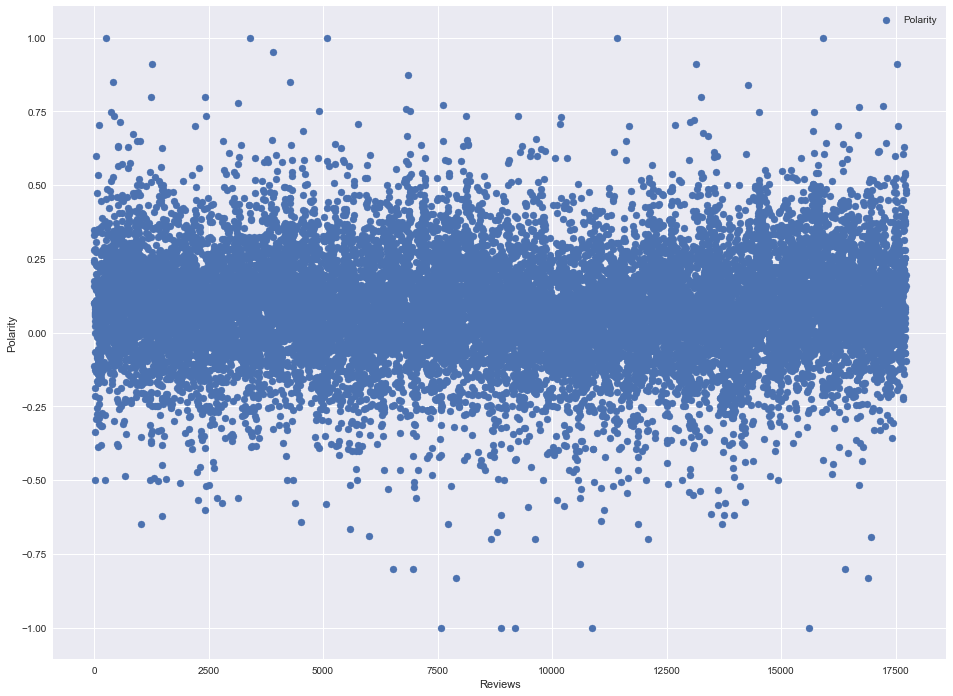

In [41]:
plt.figure(figsize=(16,12))
plt.style.use('seaborn')
plt.scatter(numlist,result,label='Polarity')
plt.xlabel('Reviews')
plt.ylabel('Polarity')
plt.legend()

In [33]:
average_polarity=result.sum()/len(result)
print('Averge Plority : {}'.format(str(average_polarity)))

Averge Plority : 0.08175742657371485


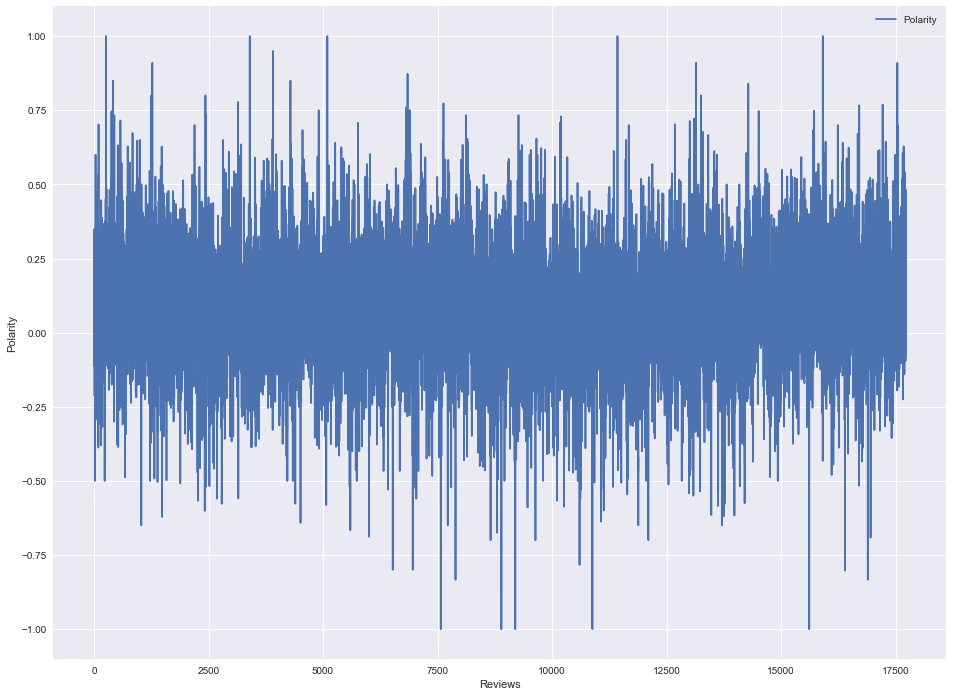

In [43]:
plt.style.use('seaborn')
plt.figure(figsize=(16,12))
plt.plot(numlist,result,label='Polarity')
plt.xlabel('Reviews')
plt.ylabel('Polarity')
plt.legend()